In [16]:
from tensorly.decomposition import parafac
from mytensor import gen_tensor_one_feature as gen1f
from mytensor import plot_uvw_one_feature as plot1f
from mytensor import gen_tensor_three_feature as gen3f
from mytensor import plot_uvw_three_feature as plot3f
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import parafac

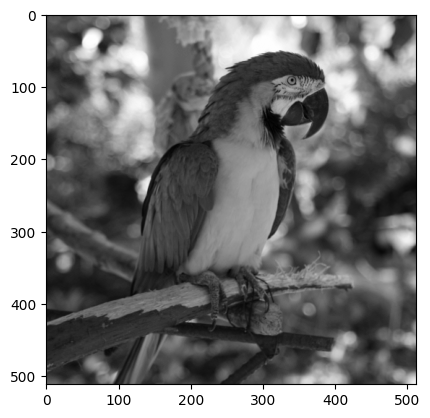

In [14]:
#Bildkompression
img = plt.imread('data/papa_gray.png')
factors = parafac(img, 200) #Faktor anpassen
img_rec = tl.kruskal_to_tensor(factors)
plt.imshow(img_rec, cmap='gray')
plt.show()

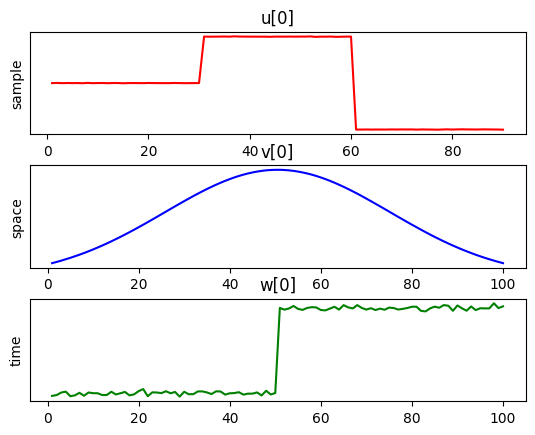

In [2]:
#Analyse mehrdimensionaler Daten
X = gen1f()
w_, fac = parafac(X, 1)
plot1f(fac)

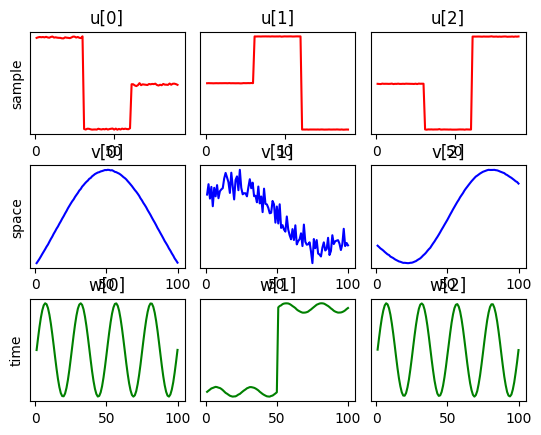

In [17]:
X = gen3f()
w_, fac = parafac(X, 3)
plot3f(fac)

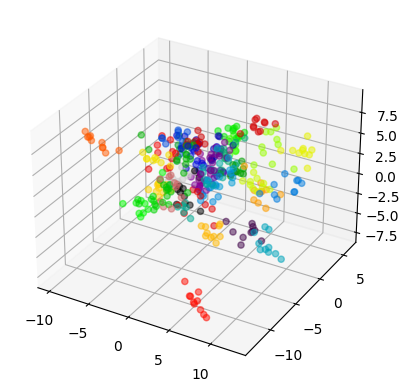

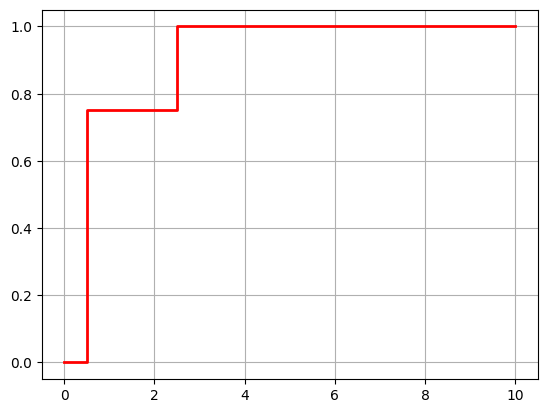

In [18]:
#Bildverarbeitung
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets
from tensorly.decomposition import tucker

faces = datasets.fetch_olivetti_faces()
G, fac = tucker(faces.data, (32, 32, 32))
data_rec = tl.tucker_to_tensor((G, fac))
x, x_test, y_true, y_test = tts(data_rec, faces.target, test_size=0.01, random_state=42)

model_lda = LDA(n_components=3)
model_lda.fit(x, y_true)
proj = model_lda.transform(x)
test_proj = model_lda.transform(x_test)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(proj[:,0], proj[:,1], proj[:,2], c=y_true, \
  cmap=plt.get_cmap('nipy_spectral', 40), alpha=0.5)
plt.show()

hits = [0]
for k in range(1,11):
  model_knn = knn(k)
  model_knn.fit(proj, y_true)
  y_pred = model_knn.predict(test_proj)
  hits.append(accuracy_score(y_test, y_pred))

plt.step(np.linspace(0, 10, 11), hits, where='mid', color='red', linewidth=2)
plt.grid(True)
plt.show()